In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [86]:
# system params
delta_t = 0.01
time = 1
v_0 = np.array([[1, -1, 4]])
a = np.array([[0, 0, -9.8]])
n = int(time/delta_t)

# get noisy data
t = np.linspace(0, 1, n)
t_batch = np.repeat(np.array([t]).T, 3, 1)
print(t.shape)
#x = v_0*t-(9.8/2)*(t**2) + np.random.normal(scale=0.05, size=n)
pos_samples = v_0*t_batch+(a/2)*(t_batch**2) + np.random.normal(scale=0.02, size=(n, 3))
x_samples = pos_samples[:, 0]
y_samples = pos_samples[:, 1]
z_samples = pos_samples[:, 2]



(100,)


In [87]:
def fit_xy(t,a,b,c):
    return a*(t**2)+b*t + c

def fit_z(t, v):
    return  v*t+(a_z/2)*(t**2)

def fit(t, a, b, c):
    return a*(t**2)+b*t+c

def fit_pos(t, pos_samples):
    paramx, covx = curve_fit(fit, t, x_samples)
    paramy, covy = curve_fit(fit, t, y_samples)
    paramz, covz = curve_fit(fit, t, z_samples)
    return [paramx, paramy, paramz]

def xy_intercept(v, z_int):
    a, b, c = v[2]
    c -= z_int
    t_int = np.roots([a, b, c])
    print("roots", t_int)
    return fit(t_int[0], *v[0]), fit(t_int[0], *v[1])


a_xy = 0
a_z = -9.8
params = fit_pos(t, pos_samples)
paramx, paramy, paramz = params

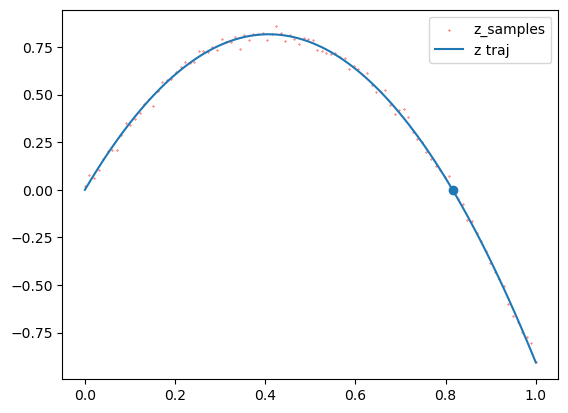

In [90]:
plt.scatter(t, z_samples, c='r', s=0.1, label="z_samples")
plt.scatter(0.8156623624592377, 0)
plt.plot(t, fit(t, *paramz), label='z traj')
plt.legend()
plt.show()

roots [ 8.15457275e-01 -4.97230984e-06]
0.8156623624592377 -0.8156936126653122


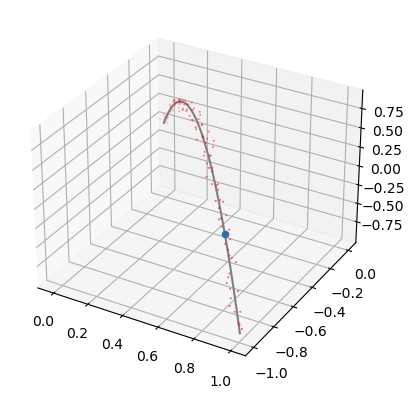

In [89]:
x_int, y_int = xy_intercept(params, 0)
print(x_int, y_int)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x, y, z = fit(t, *paramx), fit(t, *paramy), fit(t, *paramz)
ax.plot3D(x, y, z, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(x_samples, y_samples, z_samples, c='r', cmap='Greens', s=0.1)
ax.scatter3D(x_int, y_int, 0)